In [1]:
# Itinializing the Jopyter Notebook file WeatherPy.ipynb

In [12]:
# Importing relevant modules 
import requests
import json
from config import api_key

In [13]:
# Importing PrettyPrint module for a more readable JSON formatting
from pprint import pprint

In [14]:
# Import citypy 
from citipy import citipy

In [15]:
# Initialize empty lists & city counter
city_names=[]
lat=[]
lon=[]
city_count=0

temperature=[]
humidity=[]
cloudiness=[]
wind_speed=[]

# Setup base url for OpenWeatherMap API call
base_url = "http://api.openweathermap.org/data/2.5/weather?"




# Import numpy random for generating random range of latitude and longitude numbers  
from numpy import random

# set up while loop that will run until 500 valid city names are generated
while city_count<1000 :        
        # latitude values trange from -90 to 90 
        rand_lat= -90 + 180 * random.random(1)[0]
    
        # longitude ranges from -180 to 180  
        rand_lon= -180 + 360 * random.random(1)[0]
        
        rand_city=citipy.nearest_city(rand_lat, rand_lon)
        
        if rand_city.city_name not in city_names:
            
            # Build query url based on teh name of the current selected city  
            query_url = base_url + "appid=" + api_key + "&q=" + rand_city.city_name

            # Pull data from API and convert to json format  
            weather_response = requests.get(query_url)
            weather_json = weather_response.json()

            try :
                # Pull specific itemized data as requested as appedn to corresponding list
                temp_F = round(( weather_json['main']['temp'] - 273.15 ) * 9 / 5 + 32, 2)
                temperature.append(temp_F)
            
                humidity_pct = weather_json['main']['humidity']
                humidity.append(humidity_pct)
           
                cloudiness_pct = weather_json['clouds']['all']
                cloudiness.append(cloudiness_pct)
           
                wind = weather_json['wind']['speed']
                wind_speed.append(wind)
                
                lat.append(rand_lat)
                lon.append(rand_lon)
                city_names.append(rand_city.city_name)
                
                city_count+=1 
                if city_count % 10 == 0:
                    print(city_count)
                
            except (ValueError, KeyError):
                print(f"------------------------------ City missing data:{rand_city.city_name}")
        else :
            ">>>>>    City already sampled"

10
------------------------------ City missing data:taolanaro
------------------------------ City missing data:amderma
20
30
------------------------------ City missing data:amderma
40
------------------------------ City missing data:attawapiskat
------------------------------ City missing data:kayfan
50
60
------------------------------ City missing data:illoqqortoormiut
70
------------------------------ City missing data:amderma
80
------------------------------ City missing data:attawapiskat
90
------------------------------ City missing data:burica
------------------------------ City missing data:mys shmidta
------------------------------ City missing data:haibowan
------------------------------ City missing data:belushya guba
------------------------------ City missing data:taolanaro
100
------------------------------ City missing data:warqla
------------------------------ City missing data:belushya guba
------------------------------ City missing data:taolanaro
110
--------------

------------------------------ City missing data:illoqqortoormiut
------------------------------ City missing data:belushya guba
------------------------------ City missing data:tsihombe
------------------------------ City missing data:umm durman
------------------------------ City missing data:mys shmidta
570
------------------------------ City missing data:amderma
------------------------------ City missing data:belushya guba
------------------------------ City missing data:kuche
580
------------------------------ City missing data:barentsburg
590
------------------------------ City missing data:vaitupu
------------------------------ City missing data:malwan
600
------------------------------ City missing data:belushya guba
------------------------------ City missing data:khonuu
610
------------------------------ City missing data:taolanaro
------------------------------ City missing data:taolanaro
------------------------------ City missing data:belushya guba
620
-------------------

960
------------------------------ City missing data:belushya guba
------------------------------ City missing data:taolanaro
------------------------------ City missing data:karaul
------------------------------ City missing data:belushya guba
970
------------------------------ City missing data:urdzhar
------------------------------ City missing data:grand river south east
980
------------------------------ City missing data:taolanaro
------------------------------ City missing data:halalo
------------------------------ City missing data:illoqqortoormiut
------------------------------ City missing data:el faiyum
990
------------------------------ City missing data:sentyabrskiy
------------------------------ City missing data:rungata
------------------------------ City missing data:nizhneyansk
1000


Text(0.5, 1.0, 'Location of 1000 sampled cities (in lon&lat coordinates)')

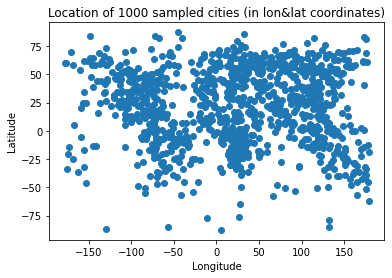

In [17]:
# Import matplotlib and plot sampled points to check visually for good coverage/diversity 
import matplotlib.pyplot as plt

plt.scatter(lon, lat)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"Location of {round(len(lon),0)} sampled cities (in lon&lat coordinates)")

In [80]:
import pandas as pd
# Create dictionary of city names and associated lat, lon coordinates
city_dict={
    "City name": city_names,
    'Longitude': lon,
    'Latitude': lat,
    'Temperature, F': temperature,
    'Humidity, %': humidity,
    'Cloudiness, %': cloudiness,
    'Wind speed, mph': wind_speed
}

# Convert dictionary to Data Frame
city_data=pd.DataFrame(city_dict)
# city_data['Hemisphere']=""

# Sort Data Frame alphabetically by City name
city_data=city_data.sort_values(by=['City name'])

# Add a new column 'Hemisphere' and label each record according to latitude
for index, row in city_data.iterrows():
        if row['Latitude']>=0 :
            city_data.loc[index,"Hemisphere"]="Northern"
        else :
            city_data.loc[index,"Hemisphere"]="Southern"

In [84]:
city_data_sorted=city_data.sort_values(by=['Hemisphere','City name'])
city_data['Hemisphere'].unique()

array(['Northern', 'Southern'], dtype=object)

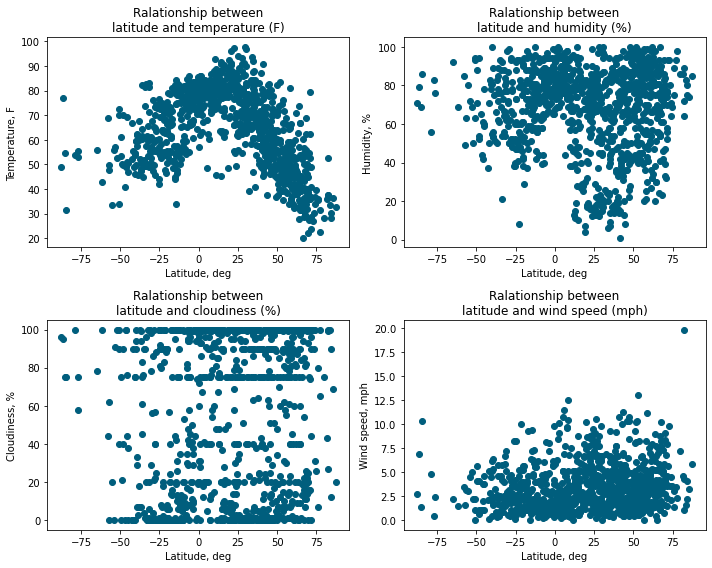

In [113]:
import numpy as np
fig, axis = plt.subplots(2, 2, figsize=(10,8))
# colors = np.where(city_data["Hemisphere"]=="Northern",'#005e7d','#ff9800')
# 
axis[0,0].scatter(city_data["Latitude"],city_data['Temperature, F'], c="#005e7d")
axis[0,0].set_xlabel("Latitude, deg")
axis[0,0].set_ylabel('Temperature, F')
axis[0,0].set_title("Ralationship between\nlatitude and temperature (F)")
# 
axis[0,1].scatter(city_data["Latitude"],city_data['Humidity, %'], c="#005e7d")
axis[0,1].set_xlabel("Latitude, deg")
axis[0,1].set_ylabel('Humidity, %')
axis[0,1].set_title("Ralationship between\nlatitude and humidity (%)")
# 
axis[1,0].scatter(city_data["Latitude"],city_data['Cloudiness, %'], c="#005e7d")
axis[1,0].set_xlabel("Latitude, deg")
axis[1,0].set_ylabel('Cloudiness, %')
axis[1,0].set_title("Ralationship between\nlatitude and cloudiness (%)")
# 
axis[1,1].scatter(city_data["Latitude"],city_data['Wind speed, mph'], c="#005e7d")
axis[1,1].set_xlabel("Latitude, deg")
axis[1,1].set_ylabel('Wind speed, mph')
axis[1,1].set_title("Ralationship between\nlatitude and wind speed (mph)")
plt.tight_layout()

711 Northern Hemisphere cities
289 Southern Hemisphere cities


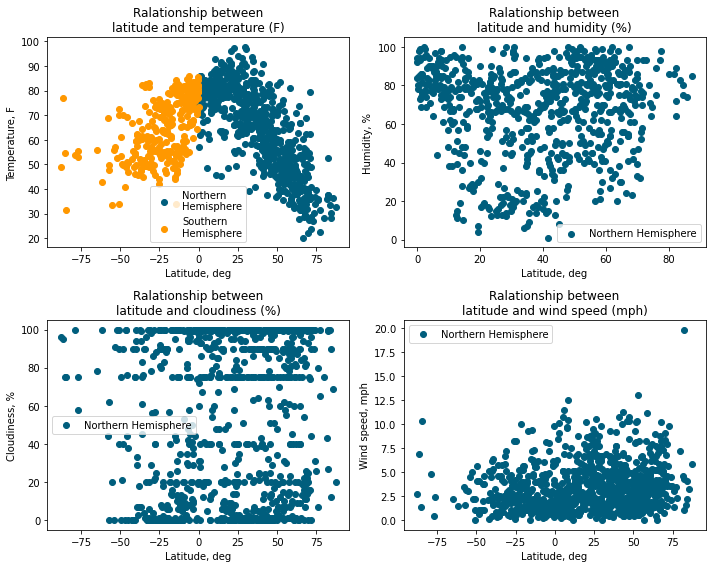

In [120]:
city_data_north=city_data[city_data['Hemisphere']=="Northern"]
city_data_south=city_data[city_data['Hemisphere']=="Southern"]

print(f"{len(city_data_north)} Northern Hemisphere cities\n{len(city_data_south)} Southern Hemisphere cities")

fig, axis = plt.subplots(2, 2, figsize=(10,8))
# 
axis[0,0].scatter(city_data_north["Latitude"],city_data_north['Temperature, F'], c='#005e7d', label="Northern\nHemisphere")
axis[0,0].scatter(city_data_south["Latitude"],city_data_south['Temperature, F'], c='#ff9800', label="Southern\nHemisphere")
axis[0,0].set_xlabel("Latitude, deg")
axis[0,0].set_ylabel('Temperature, F')
axis[0,0].set_title("Ralationship between\nlatitude and temperature (F)")
axis[0,0].legend()
# 
axis[0,1].scatter(city_data_north["Latitude"],city_data_north['Humidity, %'], c='#005e7d', label="Northern\nHemisphere")
axis[0,1].scatter(city_data_south["Latitude"],city_data_south['Humidity, %'], c='#ff9800', label="Southern\nHemisphere")
axis[0,1].set_xlabel("Latitude, deg")
axis[0,1].set_ylabel('Humidity, %')
axis[0,1].set_title("Ralationship between\nlatitude and humidity (%)")
axis[0,1].legend()
# 
axis[1,0].scatter(city_data_north["Latitude"],city_data_north['Cloudiness, %'], c='#005e7d', label="Northern Hemisphere")
axis[1,0].scatter(city_data_south["Latitude"],city_data_south['Cloudiness, %'], c='#ff9800', label="Northern Hemisphere")
axis[1,0].set_xlabel("Latitude, deg")
axis[1,0].set_ylabel('Cloudiness, %')
axis[1,0].set_title("Ralationship between\nlatitude and cloudiness (%)")
axis[1,0].legend()
# 
axis[1,1].scatter(city_data_north["Latitude"],city_data_north['Wind speed, mph'], c='#005e7d', label="Northern Hemisphere")
axis[1,1].scatter(city_data_south["Latitude"],city_data_south['Wind speed, mph'], c='#ff9800', label="Southern Hemisphere")
axis[1,1].set_xlabel("Latitude, deg")
axis[1,1].set_ylabel('Wind speed, mph')
axis[1,1].set_title("Ralationship between\nlatitude and wind speed (mph)")
axis[1,1].legend()

plt.tight_layout()